In [1]:
import sys
sys.path.append("/home/piotr/piotr/inz/indoor-semantic-segmentation")

In [2]:
import seaborn as sns
from src import multitask_datamod, constants
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm

ModuleNotFoundError: No module named 'src'

In [4]:
dm = multitask_datamod.ClassificationDataModule("/home/piotr/piotr/inz/indoor-semantic-segmentation", transforms = None)
dm.setup("fit")
train = dm.train_set

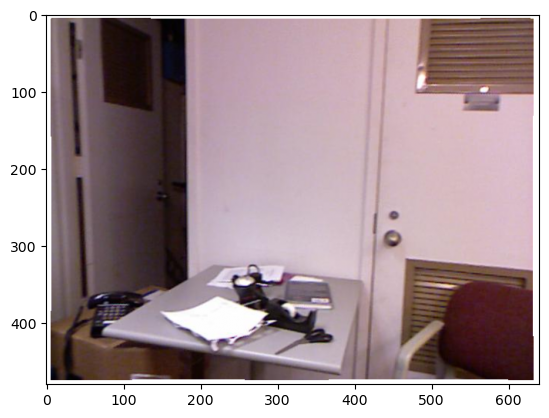

In [5]:
plt.imshow(train[0][0]/255)

In [6]:
np.unique(train[0][1], return_counts=True)

(array([5]), array([1]))

In [7]:
constants.MERGED_SCENES_IDS

{0: 'dining_room',
 1: 'bedroom',
 2: 'living_room',
 3: 'bathroom',
 4: 'office',
 5: 'other_indoor',
 6: 'kitchen'}

In [8]:
from tqdm import tqdm

a = np.zeros((len(train),7))
for idx, (img,mask) in tqdm(enumerate(train), total=len(train)):
    indices, vals = np.unique(mask, return_counts=True)
    # list(map(int,indices.tolist()))
    indices.astype(int)
    # indices[indices==255] = 40
    indices = indices.astype(np.uint8)
    a[idx,indices] = vals
    # ap[]
#     for idx in indices
#     break



100%|██████████| 795/795 [00:03<00:00, 218.89it/s]


In [19]:

# columns = [str(i) for i in range(41)]
# columns[40] = "255"
df = pd.DataFrame(a, columns=constants.MERGED_SCENES_IDS.values())
df.sum(axis=0).values

array([ 66., 192., 114.,  63.,  92., 149., 119.])

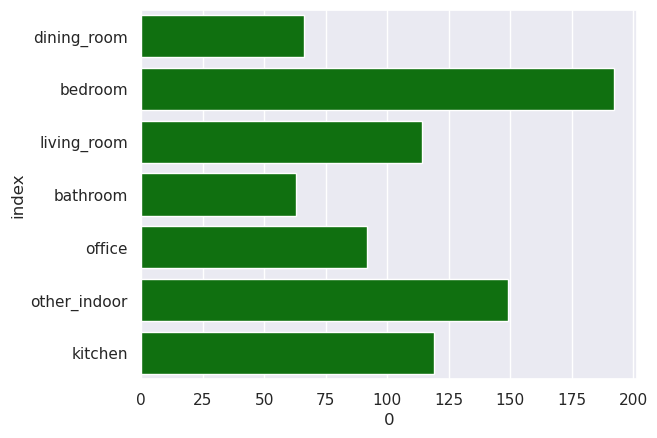

In [14]:
sns.set_theme()
ax = sns.barplot(df.sum(axis=0).reset_index(), x=0, y="index", color="green", log=False)
# for i in ax.containers:
#     ax.bar_label(i,)